## Solve the classification task on the univariate dataset created using different approaches, i.e., traditional classification, shapelet-based, feature-based, etc.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/Temperature.csv") #sostituisci con tuo percorso
#dateparse = lambda dates: pd.to_datetime(df['date'])

#df_ts = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv",
 #                parse_dates=True, index_col='date', date_parser=dateparse)

In [3]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,49,50,51,52,53,54,55,56,57,58
0,0,21.245,21.245,21.260,21.245,21.245000,21.29,21.245000,21.290000,21.290000,...,21.10,21.050000,21.050,21.10,21.00,21.10,21.10,21.10,21.100000,21.10
1,1,21.100,21.100,21.050,21.100,21.100000,21.10,21.100000,21.150000,21.100000,...,21.20,21.200000,21.125,21.10,21.10,21.10,21.10,21.10,21.100000,21.05
2,2,21.000,21.000,21.000,21.000,21.000000,21.00,21.000000,21.000000,21.000000,...,21.10,21.033333,21.025,21.00,21.00,21.00,21.00,21.00,21.000000,21.00
3,3,21.000,21.000,21.000,21.000,21.000000,21.00,20.945000,20.963333,20.890000,...,21.00,21.000000,21.000,21.00,21.00,21.00,21.00,21.00,21.000000,21.00
4,4,21.000,21.000,21.000,20.890,20.945000,21.00,20.890000,20.890000,20.890000,...,21.00,21.000000,21.000,21.00,21.00,21.00,21.00,21.00,21.000000,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,21.500,21.500,21.500,21.500,21.500000,21.50,21.500000,21.445000,21.500000,...,21.10,21.100000,21.100,21.10,21.10,21.10,21.10,21.10,21.100000,21.00
260,260,21.100,21.050,21.000,21.050,21.100000,21.00,21.000000,21.000000,21.000000,...,21.00,21.000000,21.000,21.00,21.00,21.00,21.00,21.00,21.000000,21.00
261,261,21.000,21.000,20.945,21.000,21.000000,21.00,20.963333,21.000000,20.963333,...,20.89,20.890000,20.890,20.89,20.89,20.89,20.79,20.84,20.823333,20.79
262,262,20.840,20.790,20.840,20.890,20.790000,20.84,20.890000,20.790000,20.790000,...,20.79,20.790000,20.790,20.79,20.79,20.79,20.79,20.79,20.790000,20.79


## Clustering per i label

In [4]:
X = np.array(df)

In [5]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=20, random_state=0)
km.fit(X)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=20,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=2, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

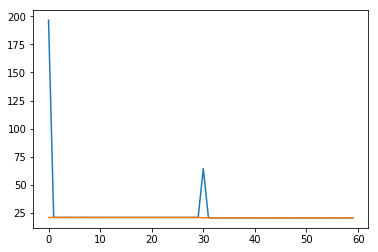

In [7]:
plt.plot(km.cluster_centers_.reshape(X.shape[1], 2))
plt.show()

In [8]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
km_dtw = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(X)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=4, n_init=1, n_jobs=None, random_state=0, tol=1e-06,
                 verbose=0)

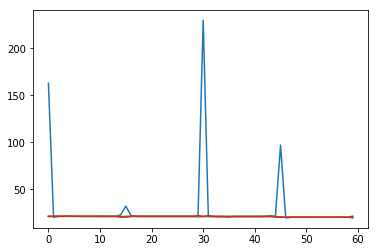

In [10]:
plt.plot(km_dtw.cluster_centers_.reshape(X.shape[1], 4))
plt.show()

In [11]:
km_dtw.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
km_dtw.inertia_

417.9513249835102

In [13]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [14]:
n_paa_segments = 11
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X)

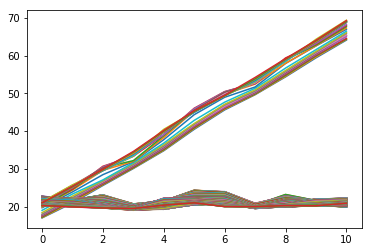

In [15]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [191]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=4, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

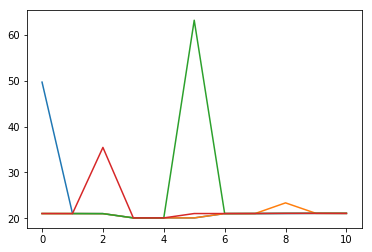

In [192]:
plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 4))
plt.show()

In [193]:
y = km.labels_

In [194]:
km.inertia_

23.92230353690988

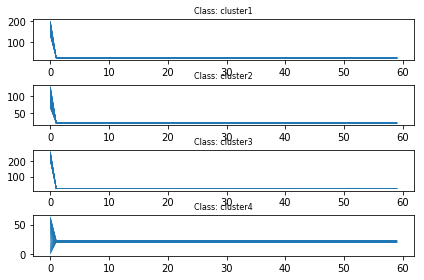

In [197]:
plt.figure()
for i, classe in enumerate(['cluster1', 'cluster2', 'cluster3', 'cluster4']):
    plt.subplot(4, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.5)
    plt.title('Class: {}'.format(classe), fontsize=8)

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()

#non si vede una ceppa

## data partitioning


In [198]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## Shaplet Classifier

In [200]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

In [201]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.5,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 184
ts_sz 60
n_classes 4
shapelet_sizes {30: 4}


In [202]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [203]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
184/184 [==============================] - 0s 1ms/step - loss: 119.5947 - categorical_accuracy: 0.2446 - categorical_crossentropy: 119.5472
Epoch 2/200
184/184 [==============================] - 0s 30us/step - loss: 827.5120 - categorical_accuracy: 0.3750 - categorical_crossentropy: 827.4070
Epoch 3/200
184/184 [==============================] - 0s 32us/step - loss: 1202.8702 - categorical_accuracy: 0.2446 - categorical_crossentropy: 1202.5967
Epoch 4/200
184/184 [==============================] - 0s 44us/step - loss: 386.8971 - categorical_accuracy: 0.5109 - categorical_crossentropy: 386.7580
Epoch 5/200
184/184 [==============================] - 0s 49us/step - loss: 1091.3673 - categorical_accuracy: 0.3750 - categorical_crossentropy: 1090.8148
Epoch 6/200
184/184 [==============================] - 0s 49us/step - loss: 363.2930 - categorical_accuracy: 0.4837 - categorical_crossentropy: 362.8628
Epoch 7/200
184/184 [==============================] - 0s 55us/step - loss: 175

Epoch 55/200
184/184 [==============================] - 0s 36us/step - loss: 952.9702 - categorical_accuracy: 0.6196 - categorical_crossentropy: 951.2687
Epoch 56/200
184/184 [==============================] - 0s 46us/step - loss: 298.2794 - categorical_accuracy: 0.7120 - categorical_crossentropy: 296.7003
Epoch 57/200
184/184 [==============================] - 0s 25us/step - loss: 22.8708 - categorical_accuracy: 0.9022 - categorical_crossentropy: 21.2993
Epoch 58/200
184/184 [==============================] - 0s 37us/step - loss: 25.8283 - categorical_accuracy: 0.9076 - categorical_crossentropy: 24.2542
Epoch 59/200
184/184 [==============================] - 0s 40us/step - loss: 29.7207 - categorical_accuracy: 0.8696 - categorical_crossentropy: 28.1432
Epoch 60/200
184/184 [==============================] - 0s 41us/step - loss: 68.8229 - categorical_accuracy: 0.8424 - categorical_crossentropy: 67.2328
Epoch 61/200
184/184 [==============================] - 0s 32us/step - loss: 63.5376

Epoch 109/200
184/184 [==============================] - 0s 49us/step - loss: 4.3232 - categorical_accuracy: 0.9674 - categorical_crossentropy: 2.4240
Epoch 110/200
184/184 [==============================] - 0s 30us/step - loss: 4.0167 - categorical_accuracy: 0.9728 - categorical_crossentropy: 2.1179
Epoch 111/200
184/184 [==============================] - 0s 43us/step - loss: 3.9957 - categorical_accuracy: 0.9783 - categorical_crossentropy: 2.0976
Epoch 112/200
184/184 [==============================] - 0s 26us/step - loss: 3.1749 - categorical_accuracy: 0.9783 - categorical_crossentropy: 1.2776
Epoch 113/200
184/184 [==============================] - 0s 30us/step - loss: 4.2067 - categorical_accuracy: 0.9728 - categorical_crossentropy: 2.3099
Epoch 114/200
184/184 [==============================] - 0s 42us/step - loss: 4.2632 - categorical_accuracy: 0.9728 - categorical_crossentropy: 2.3667
Epoch 115/200
184/184 [==============================] - 0s 37us/step - loss: 5.5587 - categor

Epoch 164/200
184/184 [==============================] - 0s 29us/step - loss: 2.6512 - categorical_accuracy: 0.9837 - categorical_crossentropy: 0.7872
Epoch 165/200
184/184 [==============================] - 0s 30us/step - loss: 2.6351 - categorical_accuracy: 0.9891 - categorical_crossentropy: 0.7717
Epoch 166/200
184/184 [==============================] - 0s 34us/step - loss: 1.9896 - categorical_accuracy: 0.9891 - categorical_crossentropy: 0.1270
Epoch 167/200
184/184 [==============================] - 0s 31us/step - loss: 2.1955 - categorical_accuracy: 0.9891 - categorical_crossentropy: 0.3337
Epoch 168/200
184/184 [==============================] - 0s 29us/step - loss: 2.3559 - categorical_accuracy: 0.9837 - categorical_crossentropy: 0.4948
Epoch 169/200
184/184 [==============================] - 0s 30us/step - loss: 3.0022 - categorical_accuracy: 0.9837 - categorical_crossentropy: 1.1414
Epoch 170/200
184/184 [==============================] - 0s 30us/step - loss: 2.3976 - categor

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={30: 4},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [204]:
y_pred = shp_clf.predict(X_test)

80/80 [==============================] - 0s 6ms/step


In [205]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9375
F1-score [0.97777778 0.90909091 0.97297297 0.88235294]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.83      1.00      0.91        20
           2       1.00      0.95      0.97        19
           3       1.00      0.79      0.88        19

    accuracy                           0.94        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.94      0.94        80



## Shaplet-distances-based Classifier

In [206]:
X_train2 = shp_clf.transform(X_train)

184/184 [==============================] - 0s 2ms/step


In [207]:
X_train2.shape

(184, 4)

In [208]:
X_train2

array([[3.97005230e-01, 1.02651566e+02, 2.01301834e+02, 2.07968760e+00],
       [8.70267010e+00, 1.74494801e+01, 1.23057167e+02, 2.13369278e+02],
       [1.45833343e-02, 2.18838558e+01, 7.68037796e+01, 2.60187256e+02],
       [7.42187537e-03, 6.59072327e+02, 1.49961334e+02, 1.37839111e+03],
       [1.25781253e-01, 7.63401184e+02, 2.01982758e+02, 1.52744543e+03],
       [1.64427090e+00, 2.12972015e+02, 2.27070332e+00, 6.77405518e+02],
       [3.38541693e-03, 4.41411476e+01, 2.03722595e+02, 2.31554699e+01],
       [2.91406274e-01, 6.68736389e+02, 1.54436539e+02, 1.39233557e+03],
       [3.42200541e+00, 5.17346382e+01, 4.89403687e+01, 3.39845856e+02],
       [1.82128918e+00, 2.39166672e+02, 1.99626450e+02, 1.71640625e+01],
       [6.25065148e-01, 5.26593933e+02, 9.05968781e+01, 1.18332788e+03],
       [1.51497409e-01, 1.38338028e+02, 2.06081390e+02, 3.13541681e-01],
       [6.21875048e-01, 1.31463547e+01, 2.08550797e+02, 6.34114609e+01],
       [3.78515631e-01, 2.05199493e+02, 2.01751053e

In [209]:
X_test2 = shp_clf.transform(X_test)

80/80 [==============================] - 0s 47us/step


In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [213]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [214]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975
F1-score [0.95652174 0.97435897 0.97297297 1.        ]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.95      0.97        20
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        19

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.98        80
weighted avg       0.98      0.97      0.98        80



In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9875
F1-score [0.97777778 0.97435897 1.         1.        ]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        19

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



## Feature-based Classifier

In [217]:
import scipy.stats as stats

In [218]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [219]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])

In [220]:
X_train3.shape

(184, 13)

In [221]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])

In [222]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975
F1-score [0.95652174 0.97435897 0.97297297 1.        ]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.95      0.97        20
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        19

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.98        80
weighted avg       0.98      0.97      0.98        80



## Time Series Classifier

In [224]:
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9875
F1-score [1.         0.97560976 1.         0.97297297]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        19
           3       1.00      0.95      0.97        19

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [225]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9875
F1-score [0.97777778 1.         0.97297297 1.        ]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        19

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



## CNN

In [226]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [227]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [243]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  60
N. LABELS:  4


In [244]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [245]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 53, 16)            144       
_________________________________________________________________
batch_normalization_13 (Batc (None, 53, 16)            64        
_________________________________________________________________
activation_13 (Activation)   (None, 53, 16)            0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 53, 16)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 49, 32)            2592      
_________________________________________________________________
batch_normalization_14 (Batc (None, 49, 32)            128       
_________________________________________________________________
activation_14 (Activation)   (None, 49, 32)           

In [231]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [232]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [246]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 147 samples, validate on 37 samples
Epoch 1/10
147/147 [==============================] - 1s 10ms/step - loss: 1.3749 - accuracy: 0.2517 - val_loss: 1.7380 - val_accuracy: 0.2703
Epoch 2/10
147/147 [==============================] - 0s 884us/step - loss: 1.3311 - accuracy: 0.3878 - val_loss: 2.0488 - val_accuracy: 0.2432
Epoch 3/10
147/147 [==============================] - 0s 924us/step - loss: 1.3279 - accuracy: 0.2925 - val_loss: 2.2300 - val_accuracy: 0.2432
Epoch 4/10
147/147 [==============================] - 0s 965us/step - loss: 1.3394 - accuracy: 0.3197 - val_loss: 1.9361 - val_accuracy: 0.2432
Epoch 5/10
147/147 [==============================] - 0s 1ms/step - loss: 1.3020 - accuracy: 0.3265 - val_loss: 1.7988 - val_accuracy: 0.2703
Epoch 6/10
147/147 [==============================] - 0s 890us/step - loss: 1.2825 - accuracy: 0.4082 - val_loss: 1.6140 - val_accuracy: 0.2703
Epoch 7/10
147/147 [==============================] - 0s 816us/step - loss: 1.2756 - accuracy:

In [247]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.275
F1-score [0.43137255 0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        22
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        19

    accuracy                           0.28        80
   macro avg       0.07      0.25      0.11        80
weighted avg       0.08      0.28      0.12        80



/Users/marco/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
cnn.evaluate(X_test_cnn, y_test)

80/80 [==============================] - 0s 340us/step


[1.4669602394104004, 0.2750000059604645]

## LSTM Classifier

In [236]:
from keras.layers import LSTM

In [237]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [238]:
lstm = build_lstm(n_timesteps, n_outputs)

In [239]:
lstm.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 260       
Total params: 280,900
Trainable params: 280,900
Non-trainable params: 0
_________________________________________________________________


In [240]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 128 samples, validate on 56 samples
Epoch 1/10
128/128 [==============================] - 0s 859us/step - loss: 1.2794 - accuracy: 0.3750 - val_loss: 1.6474 - val_accuracy: 0.2679
Epoch 2/10
128/128 [==============================] - 0s 855us/step - loss: 1.2869 - accuracy: 0.3672 - val_loss: 1.5676 - val_accuracy: 0.2679
Epoch 3/10
128/128 [==============================] - 0s 845us/step - loss: 1.2449 - accuracy: 0.4297 - val_loss: 1.5482 - val_accuracy: 0.2679
Epoch 4/10
128/128 [==============================] - 0s 863us/step - loss: 1.2526 - accuracy: 0.4453 - val_loss: 1.5876 - val_accuracy: 0.2679
Epoch 5/10
128/128 [==============================] - 0s 885us/step - loss: 1.2396 - accuracy: 0.4766 - val_loss: 1.8833 - val_accuracy: 0.2679
Epoch 6/10
128/128 [==============================] - 0s 890us/step - loss: 1.2540 - accuracy: 0.5234 - val_loss: 1.8846 - val_accuracy: 0.2679
Epoch 7/10
128/128 [==============================] - 0s 897us/step - loss: 1.2341 - accura

In [241]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.275
F1-score [0.43137255 0.         0.         0.        ]
              precision    recall  f1-score   support

           0       0.28      1.00      0.43        22
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        19

    accuracy                           0.28        80
   macro avg       0.07      0.25      0.11        80
weighted avg       0.08      0.28      0.12        80



In [242]:
lstm.evaluate(X_test_cnn, y_test)

80/80 [==============================] - 1s 9ms/step


[1.3993369579315185, 0.2750000059604645]